In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,real,"Go until jurong point, crazy.. Available only ..."
1,real,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,real,U dun say so early hor... U c already then say...
4,real,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# 1. data cleaning
# 2. eda
# 3. text pre processing 
# 4. model building
# 5. evaluation 
# 6. improvements
# 7. website
# 8. deploy

## 1.Datat Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
 encoder.fit_transform(df["Category"])

array([0, 0, 1, ..., 0, 0, 0])

In [7]:
#real == 0
#spam == 1

In [8]:
df["Category"]= encoder.fit_transform(df["Category"])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check for missing value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
#check for duplicate value
df.duplicated().sum()

415

In [11]:
df=df.drop_duplicates(keep="first")
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2.EDA

In [12]:
#exploraterey data analytics

In [13]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#checking number of spam and real
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt

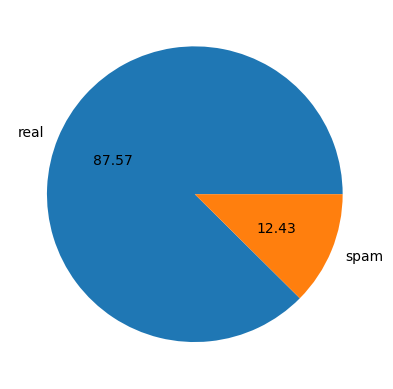

In [16]:
plt.pie(df["Category"].value_counts(), labels=["real","spam"],autopct="%0.2f")
plt.show()

## 3.Data Preprocessing

In [17]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [24]:
def processing_text(text):
    # to lower case
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    # to remove special characters
    dum=[]
    for i in text:
        if i.isalnum():
            dum.append(i)
            
    # to remove stopwords and punctuation             
    text = dum[:]
    dum.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            dum.append(i)
    
    # to stemming
    text = dum[:]
    dum.clear()
    
    for i in text:
        dum.append(ps.stem(i))
    
    return " ".join(dum)

In [25]:
# processing_text("THIS is `YASHVEER` bawne against 20% with @7 & @2103")

In [26]:
df["processed_text"]=df["Message"].apply(processing_text)

In [27]:
df.head()

,Category,Message,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [28]:
# %pip install wordcloud

In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color="white")

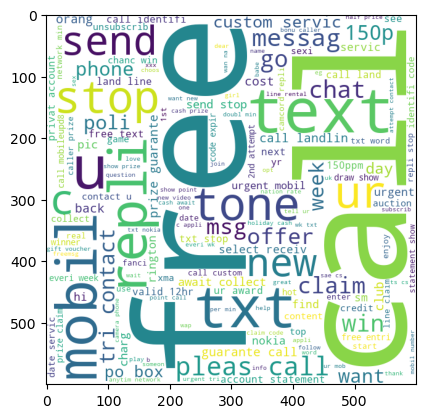

In [30]:
spam_wc= wc.generate(df[df['Category'] == 1]['processed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

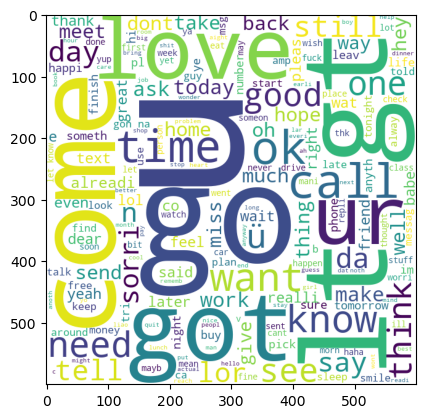

In [31]:
real_wc= wc.generate(df[df['Category'] == 0]['processed_text'].str.cat(sep=" "))
plt.imshow(real_wc)

In [32]:
#checking for the spam words in the spam mails 

In [33]:
spam_words=[]
for msg in df[df["Category"]==1]["processed_text"].tolist():
    for words in msg.split():
        spam_words.append(words)

In [34]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [35]:
print("the no of spam words is:-",len(spam_words))

the no of spam words is:- 9781


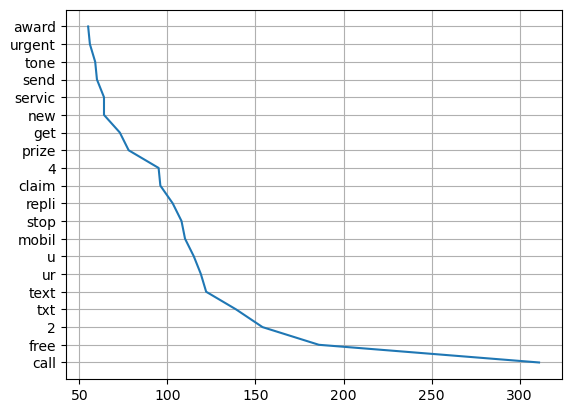

In [36]:
# import seaborn as sns
from collections import Counter
word=pd.DataFrame(Counter(spam_words).most_common(20))[0]
no=pd.DataFrame(Counter(spam_words).most_common(20))[1]
# sns.barplot("word","no")
plt.plot(no,word)
plt.grid()
plt.show()

In [37]:
#checking for the words in the real mails 

In [38]:
usefull_words=[]
for msg in df[df["Category"]==0]["processed_text"].tolist():
    for words in msg.split():
        usefull_words.append(words)

In [39]:
usefull_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [40]:
print("the no of spam words is:-",len(usefull_words))

the no of spam words is:- 35940


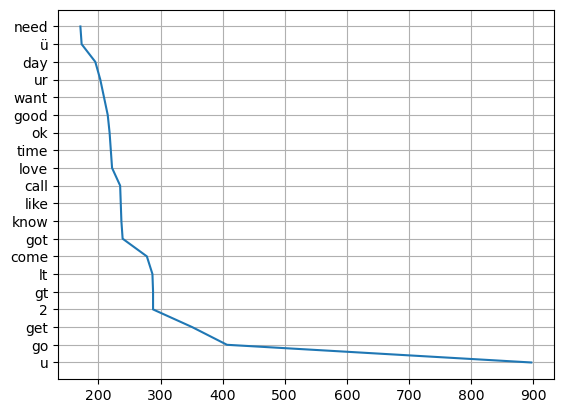

In [41]:
# import seaborn as sns
from collections import Counter
word=pd.DataFrame(Counter(usefull_words).most_common(20))[0]
no=pd.DataFrame(Counter(usefull_words).most_common(20))[1]
# sns.barplot("word","no")
plt.plot(no,word)
plt.grid()
plt.show()

## 4.Model Building

In [42]:
df

,Category,Message,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [43]:
#now converting the meaage into vectorize format(numerical) for using in ml

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
fe = TfidfVectorizer(min_df=1,stop_words="english",lowercase=1)

In [45]:
X = fe.fit_transform(df["processed_text"]).toarray()

D:\RoyalZ-Informatics\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
Y = df["Category"].values

In [48]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
#seperating data for traning and testing model

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
Y_train

array([1, 0, 0, ..., 0, 0, 1])

In [54]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
Y_test

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
LR

LogisticRegression()

In [58]:
LR.fit(X_train,Y_train)
y_predict=LR.predict(X_test)
print("Accuracy Score:-",accuracy_score(Y_test,y_predict))
print("Confusion Matrix:-\n",confusion_matrix(Y_test,y_predict))
print("Precision Score:-",precision_score(Y_test,y_predict))

Accuracy Score:- 0.9486434108527132
Confusion Matrix:-
 [[905   0]
 [ 53  74]]
Precision Score:- 1.0


In [59]:
import pickle as pk

In [60]:
pk.dump(fe,open("vectorizer.pkl","wb"))
pk.dump(LR,open("model.pkl","wb"))

In [61]:
pk.dump(accuracy_score(Y_test,y_predict),open("accu.pkl","wb"))
pk.dump(precision_score(Y_test,y_predict),open("prec.pkl","wb"))